In [211]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def jprint(obj):
    # create a formatted string of the Python JSON object
    text = json.dumps(obj, sort_keys=True, indent=4)
    print(text)

api_key = '17c351b702fe133b97f4d097617788e6315c2f49'
base_url = "https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*&NAICS2017=00&key="
complete_url = base_url + api_key
response = requests.get(complete_url)
data = response.json()
with open('data.json', 'w') as f:
    json.dump(data, f)

In [212]:
df = pd.read_json("data.json")
new_header = df.loc[0]
df = df[1:]
df.columns = new_header
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 1 to 1176
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   GEO_ID            1176 non-null   object
 1   NAME              1176 non-null   object
 2   NAICS2017         1176 non-null   object
 3   NAICS2017_LABEL   1176 non-null   object
 4   SEX               1176 non-null   object
 5   SEX_LABEL         1176 non-null   object
 6   ETH_GROUP         1176 non-null   object
 7   ETH_GROUP_LABEL   1176 non-null   object
 8   RACE_GROUP        1176 non-null   object
 9   RACE_GROUP_LABEL  1176 non-null   object
 10  VET_GROUP         1176 non-null   object
 11  VET_GROUP_LABEL   1176 non-null   object
 12  EMPSZFI           1176 non-null   object
 13  EMPSZFI_LABEL     1176 non-null   object
 14  YEAR              1176 non-null   object
 15  FIRMPDEMP         1176 non-null   object
 16  FIRMPDEMP_F       216 non-null    object
 17  RCPPDEMP      

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,...,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F,NAICS2017,us
1,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,3.0,None,8.9,None,7.7,None,7.0,None,00,1
2,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,4.7,None,19.2,None,0.0,None,13.5,None,00,1
3,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,4.7,None,8.2,None,4.8,None,7.4,None,00,1
4,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,5.9,None,4.3,None,5.6,None,6.3,None,00,1
5,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,6.0,None,16.2,None,6.7,None,10.7,None,00,1
6,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,10.1,None,21.6,None,9.9,None,11.9,None,00,1
7,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,27.9,None,37.2,None,27.7,None,26.2,None,00,1
8,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,47.9,None,42.3,None,47.1,None,46.6,None,00,1
9,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,50.0,None,47.5,None,53.3,None,49.3,None,00,1
10,0100000US,United States,00,Total for all sectors,002,Female,020,Hispanic,00,Total,...,2.7,None,0.7,None,0.6,None,0.2,None,00,1


In [215]:
sexemp = df[['SEX_LABEL', 'EMP']]
df['EMP'] = pd.to_numeric(df["EMP"])
df['EMP_S'] = pd.to_numeric(df["EMP_S"])
placesex = sexemp.groupby(['SEX_LABEL']).sum()
placesex = placesex.sort_values(['EMP'])
placesex.drop(labels = ['Classifiable'], axis = 0, inplace = True)
placesex.drop(labels = ['Total'], axis = 0, inplace = True)
placesex.drop(labels = ['Unclassifiable'], axis = 0, inplace = True)
placesex

,EMP
SEX_LABEL,
Equally male/female,102384508
Female,132094182
Male,588903798


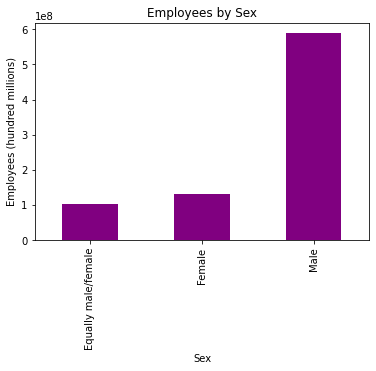

In [218]:
placesexG = placesex.plot.bar(title = 'Employees by Sex', legend = False, color = ['purple', 'red', 'blue'])
placesexG.set_ylabel('Employees (hundred millions)')
placesexG.set_xlabel('Sex')
plt.show()

In [145]:
raceemp = df[['RACE_GROUP_LABEL', 'EMP']]
df['EMP'] = pd.to_numeric(df["EMP"])
placerace = raceemp.groupby(['RACE_GROUP_LABEL']).sum()
placerace = placerace.sort_values(['EMP'])
placerace.drop(labels = ['Classifiable'], axis = 0, inplace = True)
placerace.drop(labels = ['Total'], axis = 0, inplace = True)
placerace.drop(labels = ['Unclassifiable'], axis = 0, inplace = True)
placerace.drop(labels = ['Nonminority'], axis = 0, inplace = True)
placerace.drop(labels = ['Equally minority/nonminority'], axis = 0, inplace = True)
placerace.drop(labels = ['Minority'], axis = 0, inplace = True)
placerace

,EMP
RACE_GROUP_LABEL,
Native Hawaiian and Other Pacific Islander,352587
American Indian and Alaska Native,2155878
Black or African American,12910459
Asian,55793596
White,625070072


Text(0.5, 0, 'Employees (hundred millions)')

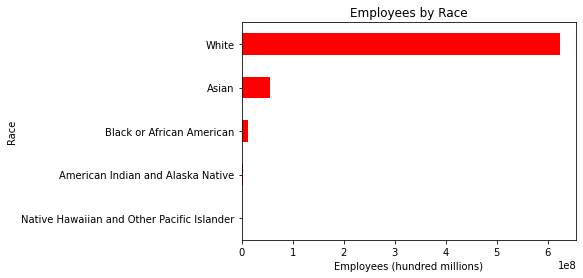

In [210]:
placeraceG = placerace.plot(title = 'Employees by Race', kind = 'barh', legend = False, color = 'red')
placeraceG.set_ylabel('Race')
placeraceG.set_xlabel('Employees (hundred millions)')

In [174]:
empstd = df[['EMP', 'EMP_S']]
empstd

,EMP,EMP_S
1,722654,7.7
2,0,0.0
3,92631,4.8
4,83449,5.6
5,116479,6.7
...,...,...
1172,0,0.0
1173,0,0.0
1174,0,0.0
1175,952,3.3


Text(0.5, 0, 'Employee Standard Deviation')

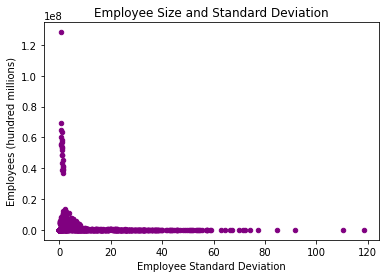

In [179]:
empstdS = empstd.plot(title = 'Employee Size and Standard Deviation', kind='scatter', x='EMP_S',y='EMP', color = 'purple')
empstdS.set_ylabel('Employees (hundred millions)')
empstdS.set_xlabel('Employee Standard Deviation')